# DABN13 - Assignment 2
## Preamble: Predicting purchases in online shops. 
This assignment will be based on a dataset on online shopper purchase data which is available on the UC Irvine Machine Learning Library. A description of all variables is available [here  ](https://www.kaggle.com/henrysue/online-shoppers-intention). Among the 11 variables in the dataset, we will only use the three following:

 - **Revenue**: (TRUE/FALSE) Whether a purchase was made by a visitor to the online shop
 - **ProductRelated_Duration**: (numerical) Time spend on pages relevant/related to the product in question.
 - **ExitRate**: (numerical) The percentage of visits to the online shop that end with visiting the site of the product at issue.


In [1]:
import numpy as np
import pandas as pd
import os
import pyreadr as prdr

## Part 1: Logistic regression with `sklearn`

In this basic part, we are getting some experience with using scikit-learn to learn logistic regressions. In the steps below, we will train a quite small logistic regression model with `Revenue` as output variable and the following inputs (in addition to the intercept):

1. ` ExitRate ` without further transformation
2. The (natural) logarithm of ` ProductRelated_Duration + 1 `

### Task 1a)
First, we need to prepare our data. Conduct the following steps:

1. Load the data into R and save it in an object called `shoppers`. The dataset is contained in a comma-separated spreadsheet. Accordingly, you will need to use the `read_csv()` command in Pandas.
2. Use the `column` method on `shoppers` to change the variable name of `ExitRate` to `ER`. More specifically, you will need to rename a particular column of `shoppers`. 
3. Create a new variable `lPR_Dur` inside `shoppers` that contains the (natural) logarithm of  `ProductRelated_Duration + 1`.

In [2]:
os.chdir('C:/Users/claes/OneDrive/Universitet/DataScience Magisterprogram/STAN51 - Maskininlärning ur ett regressionperspektiv/Inlamningar/Inlamning_2')

# 1.
shoppers = pd.read_csv("online_shoppers_intention.csv")

# 2.
shoppers = shoppers.rename(columns = {'ExitRates':'ER'})


shoppers.columns
# 3.
shoppers['lPR_Dur'] = shoppers['ProductRelated_Duration'].apply(lambda x: np.log(x+1))


### Task 1b)

Technically, we could use the `statsmodels` package to learn a logistic regressions. However, the functionality of `statsmodels` addresses applications in classical statistics rather than machine learning. Since we want to use logistic regression as a supervised learning algorithm in order to predict the output of new data points, it is much wiser to switch to scikit-learn (`sklearn`). `sklearn` provides you with simple functions that implement model training, tuning and validation and therefore covers the entire spectrum of standard methods in supervised learning.

Learning a logistic regression with `sklearn` works almost identically as with `statsmodels`. Do it as follows: 

1. Create a  Pandas series `y_1b` that contains the `Revenue` variable from `shoppers`
2. Create a similar data frame `X_1b` whose columns are  ` ER `, ` lPR_Dur ` and the square of `lPR_Dur`.
3. Instantiate a logistic regression model using the `LogisticRegression()` function from the `linear_model` module and save this model specification as `glm_spec_1b`. The function has an argument `penalty`. Set this argument to `None`. Furthermore ensure that an intercept is automatically added to the input variables.
4. Apply the `fit()`-method to `glm_spec_1b` to learn the model and save the learned model as `glm_fit_1b`. Here, specify that the model is learned using with inputs `X_1b` and output `y_1b`.


In [3]:
# 1.
y_1b = pd.Series(shoppers['Revenue'])

# 2.
X_1b = {'ER': shoppers['ER'], 'lPR_Dur': shoppers['lPR_Dur'], 'lPR_Dur_sq': shoppers['lPR_Dur']**2}
X_1b = pd.DataFrame(X_1b)

# 3.
from sklearn.linear_model import LogisticRegression
glm_spec_1b = LogisticRegression(penalty=None)

# 4.
glm_fit_1b = glm_spec_1b.fit(X_1b, y_1b)

print(glm_fit_1b.coef_)

[[-32.63987528  -0.58940172   0.06451171]]


### Task 1c) 
A fundamental principle of machine learning is that we divide the data available to us into different sets which we use for learning, model tuning and algorithm choice. 

`sklearn` makes this very simple for us since its `model_selection`-module contains the `train_test_split()` function. It returns splitted versions of all objects that you provide as inputs. I prepared a preliminary code chunk below that shows how you need to specify the desired splitted objects. Complete the code chunk by entering the inputs to `train_test_split()`. More specifically, provide

1. the data objects before splitting in correct order,
2. an argument that allocates 50% of all data points to the training data
3. an argument that sets the initial state of the random number generator to 3 (we need this to ensure replicability). 


In [4]:
from sklearn.model_selection import train_test_split

X_1b_train, X_1b_test, y_1b_train, y_1b_test = train_test_split(X_1b, y_1b, test_size = 0.5, random_state=3)

### Task 1d)
Now, please refit the model from Task 1a using only your training data from Task 1c. Save the resulting learned model as `glm_fit_1d`.

In [5]:
glm_fit_1d = glm_spec_1b.fit(X_1b_train, y_1b_train)

print(glm_fit_1d.coef_)

[[-32.23990096  -0.68454114   0.07092482]]


### Task 1e) 
Now that we have fitted our model, we want to evaluate its predictive performance on hold-out validation data. We have already created this test data in Task 1c as `y_1b_test` and `X_1b_test.`

Before we can evaluate model performance, we first need to obtain predicted probabilities for purchases on the test data. Use the ` predict_proba() `-method on `glm_fit_1d` to obtain such predicted conditional probabilities from the model fit in Task 1d on the observations in our test set. Save them as `glm_prob_1e`

According to the sklearn documentation, the columns of `glm_prob_1e` contain class probabilities where classes are ordered as they are in `glm_fit_1d.classes_`. Which column index contains the probabilities for class `True`? Write your answer into the string variable `which_column_truepreds_1e`



In [6]:
glm_prob_1e = glm_fit_1d.predict_proba(X_1b_test)
which_column_truepreds_1e = "1, meaning the glm_prob_1e[:, 1]"
print(which_column_truepreds_1e)

1, meaning the glm_prob_1e[:, 1]


### Task 1f)
In a next step, we apply a classification rule to map our predicted probabilities into class predictions. Our classification rule is to predict the most likely class.

First, create a new vector ` glm_pred_1f ` which has as many elements as ` glm_prob_1e ` and which consists entirely of the logical statement `False` (without citation marks!) 

Second, replace `False` in ` glm_pred_1f ` with `True` for all elements where the corresponding predicted probability for category `True` exceeds the threshold used for the classifier mentioned above. You can do this by indexing `glm_pred_1e` using square brackets. Simply write a true-or-false (or logical) statement in the square brackets. For rows where it is true, the value of ` glm_pred_1f ` will be changed.

Please additionally write the true-or-false statement that you use into the string variable ` logical_1f ` for the sake of making assignment evaluation simpler for us.

*Note:* We could even get class predictions by applying the `predict()`-method to `glm_fit_1d`. However, that does not allow us to fully control the classification rule.

In [7]:
# 1.
glm_pred_1f = np.full(len(glm_prob_1e), fill_value = False)

# 2.
glm_pred_1f[np.where(glm_prob_1e[:,1] > 0.5)] = True # Threshold är alltså här 0.5

print(np.unique(glm_pred_1f, return_counts=True)) 

# 3.
logical_1f = "np.where(glm_prob_1e[:,1] > 0.5)"

(array([False,  True]), array([6150,   15], dtype=int64))


### Task 1g)
Choose an appropriate error function and write its name in the string variable `chosenerrfun_1g`. Then, use the objects created in the previous tasks of this part to obtain (overall) test error for the logistic regression model fitted in Task 1d.

In [8]:
chosenerrfun_1g = "Accuracy"
testerr_1g      = glm_fit_1d.score(X_1b_test, y_1b_test)
print(testerr_1g)

0.8449310624493106


## Part 2: Class-specific prediction errors

This part is more advanced than parts 1 and 3. In classification problems, overall test error may not always be our primary concern. To get a more differentiated picture, confusion matrices and the ROC curve are useful tools. We will get both using the metric module of Scikit-learn which provides a large number of performance criteria for binary classification. 


### Task 2a)
A basic confusion matrix can easily be obtained using the `confusion_matrix` function of `sklearn.metrics`. This function only requires two inputs:

1. The test outcomes
2. The predicted class on the test set.

Obtain the confusion matrix and save it as `confumat_2a`.

In [9]:
from sklearn.metrics import confusion_matrix

confumat_2a = confusion_matrix(y_1b_test, glm_pred_1f)
print(confumat_2a)

[[5204   10]
 [ 946    5]]


### Task 2b)
The confusion matrix obtained in the last task is rather rudimentary. For this reason, we are now going to write a function which produces a more luxurious confusion matrix with additional performance measures. 

Below, I prepared a function that takes a true outcomes, predicted probabilities for the category of interest and a desired threshold probability for the classification rule as inputs and returns a dictionary object containing the corresponding confusion matrix, TPR, FPR and overall classification error. All that is left for you is the following tasks:

1. Specify the row and column names of the confusion matrix correctly
2. Use the four elements of `cmat` to calculate `FPR`, `TPR` and the classification error `error`.

In [10]:
def  performancemetrics(y_true, y_prob, cutoff):
    # Don't change the 2 rows below
    y_pred       = np.greater(y_prob,cutoff)
    cmat         = confusion_matrix(y_true,y_pred)

    # 1.
    column_names = ["Negative", "Positive"]
    row_names    = ["Negative", "Positive"]

    # 2.
    FPR   =  cmat.ravel()[1] / (cmat.ravel()[1] + cmat.ravel()[0]) # FP / (FP+TN)
    TPR   =  cmat.ravel()[3] / (cmat.ravel()[3] + cmat.ravel()[2]) # TP / (TP+FN)
    error = (cmat[[1], [0]] + cmat[[0], [1]]) / cmat.sum() # 'False_positive + False_negative / N'
    
    # Don't change the two lines below
    cmat         = pd.DataFrame(cmat, columns=column_names, index=row_names)
    allresults = {'confusion_matrix': cmat, 'FPR':FPR, "TPR":TPR, 'classification_error':error}
    return(allresults)

### Task 2c)

Now save as `metrics_2c` the output of `performancemetrics()` with the prediction object of task 2a and a threshold probability of 50% as input. Additionally, answer two questions:

1. Are you satisfied with the overall accuracy with which our model predicts purchases?
2. Is the accuracy with which observed purchases are correctly predicted satisfactory? Assume here that we have considerable interest in predicting actual purchases correctly.

In [11]:

metrics_2c = performancemetrics(y_1b_test, glm_pred_1f, 0.5)
print(metrics_2c)
overall_acc_verdict2c      = "The overall accuracy of the model is approximately 84.8 %. If the goal was to try and max the overall accuracy of the model, then this would be satisfactory."
obs_purchase_acc_verdict2c = "However, when we take a look at which observed purchases were correctly predicted and realise that our True Positive Rate is merely ~0.5%, we realize that this is very unsatisfactory."

print(overall_acc_verdict2c)
print("")
print(obs_purchase_acc_verdict2c)

{'confusion_matrix':           Negative  Positive
Negative      5204        10
Positive       946         5, 'FPR': 0.0019179133103183737, 'TPR': 0.005257623554153523, 'classification_error': array([0.15506894])}
The overall accuracy of the model is approximately 84.8 %. If the goal was to try and max the overall accuracy of the model, then this would be satisfactory.

However, when we take a look at which observed purchases were correctly predicted and realise that our True Positive Rate is merely ~0.5%, we realize that this is very unsatisfactory.


### Task 2d)

Assume we would like to get a classifier that has relatively balanced class-specific performance. In other words, we want to choose a threshold such that TPR is approximately 1-FPR. In order to see the trade-offs that are available to us, we will look at a ROC curve.

ROC curves can be plotted using the `RocCurveDisplay.from_predictions()` function in the sklearn metrics module. The inputs to this function are 

1. The test outcomes
2. The predicted probabilities for class 1 on the test set.

Use the code chunk below to plot a ROC curve. Then proceed with the rest of this task in the following text block.

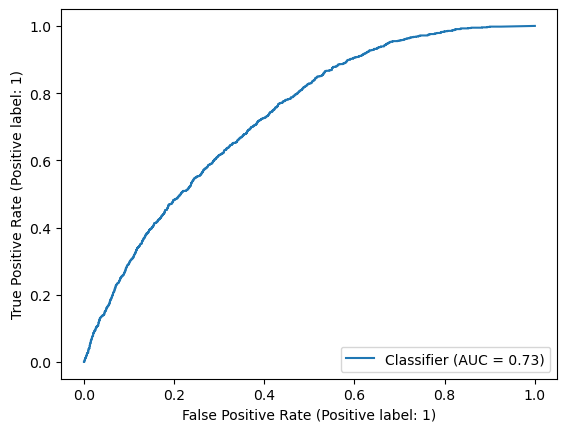

In [12]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_1b_test, glm_prob_1e[:,1])

Unfortunately, the plotted ROC curve does not indicate the threshold value leading to a particular point on the curve. Fortunately, the information contained in a ROC curve can be obtained using the `roc_curve()` function in the sklearn metrics module.

The inputs to  `roc_curve()` are true outputs and the predicted probabilities for class 1. Use the corresponding series from Part 1 of this assignment as function inputs and save the result as `roc_fpr_2d`, `roc_tpr_2d` and `roc_thresholds_2d`.

Next, find the the threshold that balances class-specific performance best. You could do that by finding the index at which TPR and (1-FPR) are as close are possible. Then you simply return the value of `roc_thresholds_2d` at this index. State your chosen threshold in the  variable `opt_threshold_2d`. Round to two decimals, if needed.

In [13]:
from sklearn.metrics import roc_curve

# 1.
roc_fpr_2d, roc_tpr_2d, roc_thresholds_2d = roc_curve(y_1b_test, glm_prob_1e[:,1])

# pd.Series(abs(roc_tpr_2d -(1-roc_fpr_2d))).idxmin() # Här hittar vi index där abs( roc_tpr_2d -(1-roc_fpr_2d)) ) är som minst

opt_threshold_2d = roc_thresholds_2d[pd.Series(abs(roc_tpr_2d -(1-roc_fpr_2d))).idxmin()]

print(opt_threshold_2d)


0.18672528126393656


### Task 2e)
To what extend does our chosen threshold from Task 2d compromise overall accuracy? To find this out, use your `performancemetrics()` function from Task 2b and save the output that you get with the threshold chosen in Task 2d as `metrics_2e`.

Then, use the string variable `is_accuracy_compromised_2e` to discuss whether overall accuracy is noteably affected if we switch from a threshold probability of 50% to a value that balances class-specific prediction performance.

In [14]:
metrics_2e = performancemetrics(y_1b_test, glm_prob_1e[:,1], cutoff = opt_threshold_2d)
print(metrics_2e)

is_accuracy_compromised_2e = "Accuracy is compromised where we can see that the classification-error has risen to ~0.34. On the other hand the model's capability of predicting actual purchases has improved dramatically."
print(is_accuracy_compromised_2e)

{'confusion_matrix':           Negative  Positive
Negative      3438      1776
Positive       324       627, 'FPR': 0.34062140391254314, 'TPR': 0.6593059936908517, 'classification_error': array([0.3406326])}
Accuracy is compromised where we can see that the classification-error has risen to ~0.34. On the other hand the model's capability of predicting actual purchases has improved dramatically.


## Part 3: Multiclass logistic regression with `sklearn`

We can use the `LogisticRegression` function from `sklearn` to learn models whose output variable has more than two categories. The data we are using to learn a multiclass logistic regression is drug consumption data. Our response variable is usage of drugs (Cocaine , Crack, Ecstasy, and Heroin) and we have three possible responses, "never used", "used more than a year ago", and "used within a year". As explanatory variables we have personality test data, demographic data, and consumption of chocolate, alcohol, and nicotine.

### Task 3a)

Conduct the following steps to prepare your data:

1. Load `drug_train.RDS` using the `read_r()` function in the `pyreadr` package and save it as a data frame `drug_data`. 
2. Extract the variable *drugs.usage* into a Pandas series called `y_3a`
3. Create a Pandas dataframe `X_3a` containing all other variables in `drug_data`.  Note that you will need to transform categorical variables into indicator variables, e.g. using the `get_dummies()` function in Pandas.

In [15]:
# 1.
drug_data = prdr.read_r('drug_train.RDS')
drug_data = drug_data[None]

# 2.
y_3a = pd.Series(drug_data['drugs.usage'])

# 3.
# Kategoriska variabler är:
    # Chocolate.consumption  
    # Alcohol.consumption
    # Nicotine.consumption
    # Ethnicity
    # Fictitious.drug.Semeron.consumption 

X_3a = pd.get_dummies(drug_data.loc[:, drug_data.columns != 'drugs.usage'])


### Task 3b)

Specify and learn fit a multinomial logistic regression using `LogisticRegression()`. In the specification, choose no penalty and make sure an intercept is added. Additionally, set the `multi_class` argument to `'multinomial'`. Lastly, increase the number of iterations if this is needed for the learning algorithm to converge.

Save the resulting object as `mlogit_fit_3b`.

In [16]:
mlogit_fit_3b = LogisticRegression(multi_class='multinomial',
                                   penalty = None,
                                   max_iter=10000).fit(X_3a, y_3a)

print(mlogit_fit_3b.coef_)

[[-5.60220635e-01 -4.00943368e-01  5.52563578e-02 -2.96961591e-01
   4.31290717e-02  1.46668455e-01  7.71575421e-02 -9.66154689e-02
  -1.10528197e-01 -5.53374981e-02  3.48085467e-01 -2.44795508e-01
  -4.65142286e-01  2.02428528e+00  5.61076464e-01  6.60605073e-01
   9.26659527e-02  9.33070252e-01  2.16434302e-01  1.64842936e-01
   4.91212365e-01  7.38408366e-01  8.47267591e-02  4.08029971e+00
  -2.32191791e+00 -4.44034310e-01]
 [ 2.23574114e-02  2.37229888e-01 -6.51619737e-02  4.10254181e-01
  -2.22983464e-02  2.40274804e-03 -1.67082244e-01  4.50527717e-02
   1.77968301e-01 -5.07797013e-02 -2.60545328e-01  1.78061466e+00
   2.02584508e+00 -5.39235523e+00 -8.68045550e-01  5.87885454e-01
  -1.30573540e+00 -1.12097053e+00  1.05132734e-01 -5.70057703e-01
  -6.52818168e-01 -4.74298371e-02 -8.85647489e-01 -1.45340837e+00
   2.57271530e+00 -2.70520242e+00]
 [ 5.37863223e-01  1.63713480e-01  9.90561593e-03 -1.13292590e-01
  -2.08307253e-02 -1.49071203e-01  8.99247015e-02  5.15626971e-02
  -6.7

### Task 3c)

We now skip the entire data splitting step that we discussed in Part 1. Instead, we say that model `mlogit_fit_3b` is our result of the entire modeling process and it is implemented in practice. We now get new test data for which we obtain output predictions. To prepare this, conduct the following steps:

1. Load *drug_test.RDS* as object `drug_data_test`.
2. Create an input variable matrix `X_3c_test` in the same way as in Task 3a, but using `drug_data_test` instead of `drug_data`.

In [17]:
drug_data_test = prdr.read_r('drug_test.RDS')
drug_data_test = drug_data_test[None]

X_3c_test = pd.get_dummies(drug_data_test.loc[:, drug_data.columns != 'drugs.usage'])

### Task 3d)

Get predictions from model `mlogit_fit_3b` for your test data using the `predict_proba()` and `predict()` methods. Save your predictions as `mlogit_prob_3c` and `mlogit_pred_3c`, respectively.


In [18]:
mlogit_prob_3c = mlogit_fit_3b.predict_proba(X_3c_test)
mlogit_pred_3c = mlogit_fit_3b.predict(X_3c_test)

As time passes, you also observe outputs for your first batch of test data. This allows you to evaluate the accuracy of your prediction model during deployment. The variable *drugs.usage* in `drug.data.test` contains these test outputs. Extract them into a vector `ytest_3d`.

Then, use the `confusion_matrix` function in sklearn to get a confusion matrix. Save it as `confumat_3d`.


In [19]:
ytest_3d    = drug_data_test['drugs.usage']
confumat_3d = confusion_matrix(ytest_3d, mlogit_pred_3c)
print(confumat_3d)

[[131  50  17]
 [ 43 186  22]
 [ 34  48  34]]


In [20]:
# För att se sådan att det är avslutat/kör hela scriptet

print("Scriptet är nu färdigkört")

Scriptet är nu färdigkört
